In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pymorphy3
import re
import string

### Сделать разбор кластеров и проанализировать, сделать рабочей лематизацию

In [3]:
df = pd.read_csv("kinopoisk.csv", index_col="Unnamed: 0")

In [4]:
df

,namemovie,date,duration,country,genre,description
0,1+1 (2011),2011,1 ч 52 мин,Франция,"драма, комедия","Пострадав в результате несчастного случая, бог..."
1,Интерстеллар (2014),2014,2 ч 49 мин,"США, Великобритания, Канада","фантастика, драма, приключения","Когда засуха, пыльные бури и вымирание растени..."
2,Побег из Шоушенка (1994),1994,2 ч 22 мин,США,драма,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...
3,Джентльмены (2019),2019,1 ч 53 мин,"США, Великобритания","криминал, комедия, боевик",Один ушлый американец ещё со студенческих лет ...
4,Остров проклятых (2009),2009,2 ч 18 мин,"США, Канада","триллер, детектив, драма",Два американских судебных пристава отправляютс...
...,...,...,...,...,...,...
245,День сурка (1993),1993,1 ч 41 мин,США,"фэнтези, драма, мелодрама, комедия",Телевизионный комментатор Фил Коннорс каждый г...
246,Сплетение судеб (2023),2023,2 ч 1 мин,"Франция, Канада, Италия, Бельгия",драма,Смита живет в Индии и мечтает дать своей мален...
247,Ford против Ferrari (2019),2019,2 ч 32 мин,США,"биография, спорт, драма, боевик",В начале 1960-х Генри Форд II принимает решени...
248,Хоббит: Битва пяти воинств (2014),2014,2 ч 24 мин,"Новая Зеландия, США","фэнтези, приключения, боевик",Когда отряд из тринадцати гномов нанимал хобби...


In [5]:
df.shape

(250, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   namemovie    250 non-null    object
 1   date         250 non-null    int64 
 2   duration     250 non-null    object
 3   country      250 non-null    object
 4   genre        250 non-null    object
 5   description  250 non-null    object
dtypes: int64(1), object(5)
memory usage: 13.7+ KB


In [7]:
df.head()

,namemovie,date,duration,country,genre,description
0,1+1 (2011),2011,1 ч 52 мин,Франция,"драма, комедия","Пострадав в результате несчастного случая, бог..."
1,Интерстеллар (2014),2014,2 ч 49 мин,"США, Великобритания, Канада","фантастика, драма, приключения","Когда засуха, пыльные бури и вымирание растени..."
2,Побег из Шоушенка (1994),1994,2 ч 22 мин,США,драма,Бухгалтер Энди Дюфрейн обвинён в убийстве собс...
3,Джентльмены (2019),2019,1 ч 53 мин,"США, Великобритания","криминал, комедия, боевик",Один ушлый американец ещё со студенческих лет ...
4,Остров проклятых (2009),2009,2 ч 18 мин,"США, Канада","триллер, детектив, драма",Два американских судебных пристава отправляютс...


In [8]:
mod = nltk.WordNetLemmatizer()

In [9]:
stop_words = stopwords.words('russian')
custom_stopwords = ["ещё"]
stop_words.extend(custom_stopwords)

In [10]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [11]:
def remove_punctuation(text):
    return "".join([ch if ch not in string.punctuation else " " for ch in text])

def remove_spaces(text):
    return re.sub(r'\s+', " ", text)

def remove_numbers(text):
    return "".join([i if not i.isdigit() else " " for i in text])

def lematazing(text):
    return [morph.parse(word)[0].normal_form for word in text]
    

def tokenize(text):
    tokens = word_tokenize(text)
    return [token for token in tokens if token]

def remove_stopwords(tokens, stopwords):
    removed = []
    for token in tokens:
        if token.lower() not in stopwords:
            removed.append(token)
    return removed

In [12]:
df.description = df.description.apply(lambda x: remove_punctuation(x.lower()))

In [13]:
df

,namemovie,date,duration,country,genre,description
0,1+1 (2011),2011,1 ч 52 мин,Франция,"драма, комедия",пострадав в результате несчастного случая бог...
1,Интерстеллар (2014),2014,2 ч 49 мин,"США, Великобритания, Канада","фантастика, драма, приключения",когда засуха пыльные бури и вымирание растени...
2,Побег из Шоушенка (1994),1994,2 ч 22 мин,США,драма,бухгалтер энди дюфрейн обвинён в убийстве собс...
3,Джентльмены (2019),2019,1 ч 53 мин,"США, Великобритания","криминал, комедия, боевик",один ушлый американец ещё со студенческих лет ...
4,Остров проклятых (2009),2009,2 ч 18 мин,"США, Канада","триллер, детектив, драма",два американских судебных пристава отправляютс...
...,...,...,...,...,...,...
245,День сурка (1993),1993,1 ч 41 мин,США,"фэнтези, драма, мелодрама, комедия",телевизионный комментатор фил коннорс каждый г...
246,Сплетение судеб (2023),2023,2 ч 1 мин,"Франция, Канада, Италия, Бельгия",драма,смита живет в индии и мечтает дать своей мален...
247,Ford против Ferrari (2019),2019,2 ч 32 мин,США,"биография, спорт, драма, боевик",в начале 1960 х генри форд ii принимает решени...
248,Хоббит: Битва пяти воинств (2014),2014,2 ч 24 мин,"Новая Зеландия, США","фэнтези, приключения, боевик",когда отряд из тринадцати гномов нанимал хобби...


In [14]:
df.description = df.description.apply(lambda x: remove_spaces(x.lower()))

In [15]:
df

,namemovie,date,duration,country,genre,description
0,1+1 (2011),2011,1 ч 52 мин,Франция,"драма, комедия",пострадав в результате несчастного случая бога...
1,Интерстеллар (2014),2014,2 ч 49 мин,"США, Великобритания, Канада","фантастика, драма, приключения",когда засуха пыльные бури и вымирание растений...
2,Побег из Шоушенка (1994),1994,2 ч 22 мин,США,драма,бухгалтер энди дюфрейн обвинён в убийстве собс...
3,Джентльмены (2019),2019,1 ч 53 мин,"США, Великобритания","криминал, комедия, боевик",один ушлый американец ещё со студенческих лет ...
4,Остров проклятых (2009),2009,2 ч 18 мин,"США, Канада","триллер, детектив, драма",два американских судебных пристава отправляютс...
...,...,...,...,...,...,...
245,День сурка (1993),1993,1 ч 41 мин,США,"фэнтези, драма, мелодрама, комедия",телевизионный комментатор фил коннорс каждый г...
246,Сплетение судеб (2023),2023,2 ч 1 мин,"Франция, Канада, Италия, Бельгия",драма,смита живет в индии и мечтает дать своей мален...
247,Ford против Ferrari (2019),2019,2 ч 32 мин,США,"биография, спорт, драма, боевик",в начале 1960 х генри форд ii принимает решени...
248,Хоббит: Битва пяти воинств (2014),2014,2 ч 24 мин,"Новая Зеландия, США","фэнтези, приключения, боевик",когда отряд из тринадцати гномов нанимал хобби...


In [16]:
df.description = df.description.apply(lambda x: remove_numbers(x.lower()))

In [17]:
df

,namemovie,date,duration,country,genre,description
0,1+1 (2011),2011,1 ч 52 мин,Франция,"драма, комедия",пострадав в результате несчастного случая бога...
1,Интерстеллар (2014),2014,2 ч 49 мин,"США, Великобритания, Канада","фантастика, драма, приключения",когда засуха пыльные бури и вымирание растений...
2,Побег из Шоушенка (1994),1994,2 ч 22 мин,США,драма,бухгалтер энди дюфрейн обвинён в убийстве собс...
3,Джентльмены (2019),2019,1 ч 53 мин,"США, Великобритания","криминал, комедия, боевик",один ушлый американец ещё со студенческих лет ...
4,Остров проклятых (2009),2009,2 ч 18 мин,"США, Канада","триллер, детектив, драма",два американских судебных пристава отправляютс...
...,...,...,...,...,...,...
245,День сурка (1993),1993,1 ч 41 мин,США,"фэнтези, драма, мелодрама, комедия",телевизионный комментатор фил коннорс каждый г...
246,Сплетение судеб (2023),2023,2 ч 1 мин,"Франция, Канада, Италия, Бельгия",драма,смита живет в индии и мечтает дать своей мален...
247,Ford против Ferrari (2019),2019,2 ч 32 мин,США,"биография, спорт, драма, боевик",в начале х генри форд ii принимает решени...
248,Хоббит: Битва пяти воинств (2014),2014,2 ч 24 мин,"Новая Зеландия, США","фэнтези, приключения, боевик",когда отряд из тринадцати гномов нанимал хобби...


In [18]:
df.description = df.description.apply(lambda x: tokenize(x))

In [19]:
df

,namemovie,date,duration,country,genre,description
0,1+1 (2011),2011,1 ч 52 мин,Франция,"драма, комедия","[пострадав, в, результате, несчастного, случая..."
1,Интерстеллар (2014),2014,2 ч 49 мин,"США, Великобритания, Канада","фантастика, драма, приключения","[когда, засуха, пыльные, бури, и, вымирание, р..."
2,Побег из Шоушенка (1994),1994,2 ч 22 мин,США,драма,"[бухгалтер, энди, дюфрейн, обвинён, в, убийств..."
3,Джентльмены (2019),2019,1 ч 53 мин,"США, Великобритания","криминал, комедия, боевик","[один, ушлый, американец, ещё, со, студенчески..."
4,Остров проклятых (2009),2009,2 ч 18 мин,"США, Канада","триллер, детектив, драма","[два, американских, судебных, пристава, отправ..."
...,...,...,...,...,...,...
245,День сурка (1993),1993,1 ч 41 мин,США,"фэнтези, драма, мелодрама, комедия","[телевизионный, комментатор, фил, коннорс, каж..."
246,Сплетение судеб (2023),2023,2 ч 1 мин,"Франция, Канада, Италия, Бельгия",драма,"[смита, живет, в, индии, и, мечтает, дать, сво..."
247,Ford против Ferrari (2019),2019,2 ч 32 мин,США,"биография, спорт, драма, боевик","[в, начале, х, генри, форд, ii, принимает, реш..."
248,Хоббит: Битва пяти воинств (2014),2014,2 ч 24 мин,"Новая Зеландия, США","фэнтези, приключения, боевик","[когда, отряд, из, тринадцати, гномов, нанимал..."


In [20]:
df.description = df.description.apply(lambda x: lematazing(x))

In [21]:
df

,namemovie,date,duration,country,genre,description
0,1+1 (2011),2011,1 ч 52 мин,Франция,"драма, комедия","[пострадать, в, результат, несчастный, случай,..."
1,Интерстеллар (2014),2014,2 ч 49 мин,"США, Великобритания, Канада","фантастика, драма, приключения","[когда, засуха, пыльный, буря, и, вымирание, р..."
2,Побег из Шоушенка (1994),1994,2 ч 22 мин,США,драма,"[бухгалтер, энди, дюфрейн, обвинить, в, убийст..."
3,Джентльмены (2019),2019,1 ч 53 мин,"США, Великобритания","криминал, комедия, боевик","[один, ушлый, американец, ещё, с, студенческий..."
4,Остров проклятых (2009),2009,2 ч 18 мин,"США, Канада","триллер, детектив, драма","[два, американский, судебный, пристав, отправл..."
...,...,...,...,...,...,...
245,День сурка (1993),1993,1 ч 41 мин,США,"фэнтези, драма, мелодрама, комедия","[телевизионный, комментатор, фил, коннорс, каж..."
246,Сплетение судеб (2023),2023,2 ч 1 мин,"Франция, Канада, Италия, Бельгия",драма,"[смит, жить, в, индия, и, мечтать, дать, свой,..."
247,Ford против Ferrari (2019),2019,2 ч 32 мин,США,"биография, спорт, драма, боевик","[в, начало, х, генри, форд, ii, принимать, реш..."
248,Хоббит: Битва пяти воинств (2014),2014,2 ч 24 мин,"Новая Зеландия, США","фэнтези, приключения, боевик","[когда, отряд, из, тринадцать, гном, нанимать,..."


In [22]:
df.description = df.description.apply(lambda x: remove_stopwords(x, stop_words))

In [23]:
df

,namemovie,date,duration,country,genre,description
0,1+1 (2011),2011,1 ч 52 мин,Франция,"драма, комедия","[пострадать, результат, несчастный, случай, бо..."
1,Интерстеллар (2014),2014,2 ч 49 мин,"США, Великобритания, Канада","фантастика, драма, приключения","[засуха, пыльный, буря, вымирание, растение, п..."
2,Побег из Шоушенка (1994),1994,2 ч 22 мин,США,драма,"[бухгалтер, энди, дюфрейн, обвинить, убийство,..."
3,Джентльмены (2019),2019,1 ч 53 мин,"США, Великобритания","криминал, комедия, боевик","[ушлый, американец, студенческий, год, приторг..."
4,Остров проклятых (2009),2009,2 ч 18 мин,"США, Канада","триллер, детектив, драма","[американский, судебный, пристав, отправляться..."
...,...,...,...,...,...,...
245,День сурка (1993),1993,1 ч 41 мин,США,"фэнтези, драма, мелодрама, комедия","[телевизионный, комментатор, фил, коннорс, каж..."
246,Сплетение судеб (2023),2023,2 ч 1 мин,"Франция, Канада, Италия, Бельгия",драма,"[смит, жить, индия, мечтать, дать, свой, мален..."
247,Ford против Ferrari (2019),2019,2 ч 32 мин,США,"биография, спорт, драма, боевик","[начало, х, генри, форд, ii, принимать, решени..."
248,Хоббит: Битва пяти воинств (2014),2014,2 ч 24 мин,"Новая Зеландия, США","фэнтези, приключения, боевик","[отряд, тринадцать, гном, нанимать, хоббит, би..."


In [24]:
from wordcloud import WordCloud

In [25]:
text = " ".join(df.description.astype(str).tolist()) 

In [26]:
word_cld = WordCloud(width=800, height=600, background_color='white').generate(text)

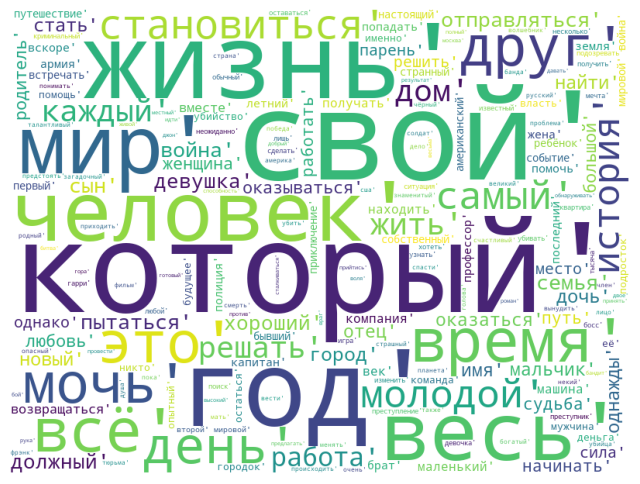

In [27]:
plt.figure(figsize=(8, 8))
plt.imshow(word_cld)
plt.axis('off')
plt.show()

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [29]:
vector = CountVectorizer()
count_matrix = vector.fit_transform(df.description.apply(lambda x: "".join(word + " " for word in x)))

In [30]:
matrix = count_matrix

In [31]:
from sklearn.cluster import KMeans

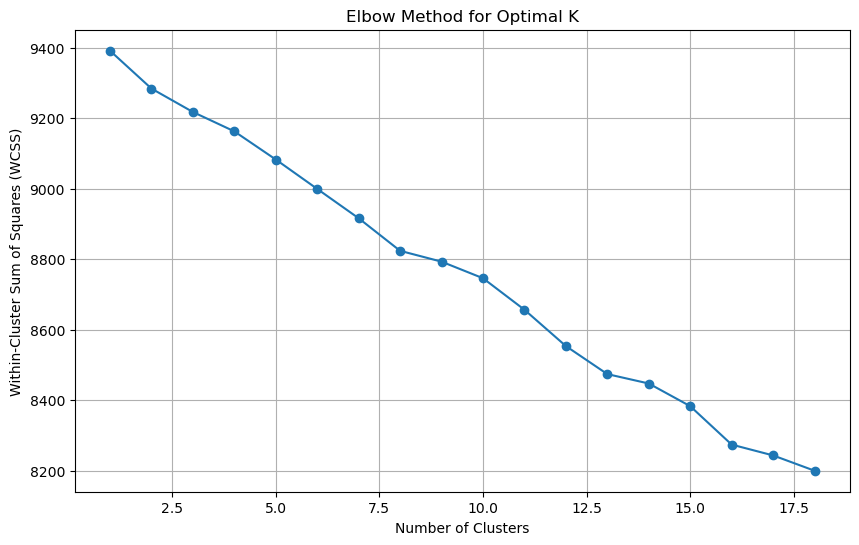

In [32]:
wgss = []
max_clusters = 18

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42, n_init=18)
    kmeans.fit(matrix)
    wgss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wgss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.grid()
plt.show()

In [33]:
tfidf = TfidfVectorizer(stop_words=stop_words, ngram_range=(1,3), max_features=10)
tfidf_matrix = tfidf.fit_transform(df.description.apply(lambda x: "".join(word + " " for word in x)))
tfidf_matrix.shape

(250, 10)

In [34]:
tfidf_matrix.toarray()

array([[0.55486391, 0.        , 0.        , ..., 0.        , 0.        ,
        0.54978686],
       [0.        , 0.64418588, 0.        , ..., 0.        , 0.        ,
        0.61418176],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.71332772,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [35]:
df.shape

(250, 6)

In [36]:
wgss = []

for i in range(1, 18):
    kmean = KMeans(n_clusters=i, init="k-means++", random_state=42, n_init=18)
    kmean.fit(tfidf_matrix)
    wgss.append(kmean.inertia_)

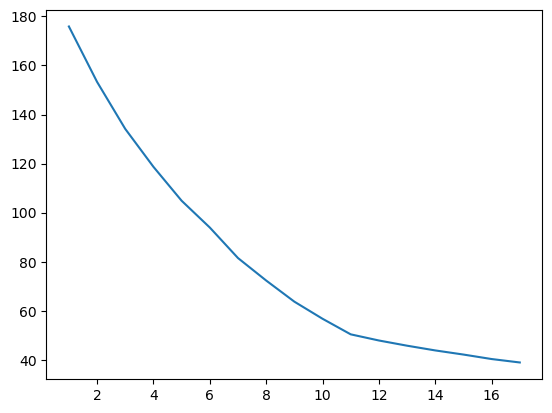

In [37]:
plt.plot(range(1, 18), wgss);
plt.show()

In [38]:
n_clusters = 11

In [39]:
kmeans = KMeans(n_clusters=n_clusters, n_init=18, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

In [40]:
df["cluster"] = clusters

In [41]:
df["cluster"].value_counts()

cluster
3     34
4     28
0     25
5     25
6     24
2     22
8     21
1     21
10    17
7     17
9     16
Name: count, dtype: int64

In [42]:
df

,namemovie,date,duration,country,genre,description,cluster
0,1+1 (2011),2011,1 ч 52 мин,Франция,"драма, комедия","[пострадать, результат, несчастный, случай, бо...",10
1,Интерстеллар (2014),2014,2 ч 49 мин,"США, Великобритания, Канада","фантастика, драма, приключения","[засуха, пыльный, буря, вымирание, растение, п...",7
2,Побег из Шоушенка (1994),1994,2 ч 22 мин,США,драма,"[бухгалтер, энди, дюфрейн, обвинить, убийство,...",8
3,Джентльмены (2019),2019,1 ч 53 мин,"США, Великобритания","криминал, комедия, боевик","[ушлый, американец, студенческий, год, приторг...",0
4,Остров проклятых (2009),2009,2 ч 18 мин,"США, Канада","триллер, детектив, драма","[американский, судебный, пристав, отправляться...",3
...,...,...,...,...,...,...,...
245,День сурка (1993),1993,1 ч 41 мин,США,"фэнтези, драма, мелодрама, комедия","[телевизионный, комментатор, фил, коннорс, каж...",9
246,Сплетение судеб (2023),2023,2 ч 1 мин,"Франция, Канада, Италия, Бельгия",драма,"[смит, жить, индия, мечтать, дать, свой, мален...",4
247,Ford против Ferrari (2019),2019,2 ч 32 мин,США,"биография, спорт, драма, боевик","[начало, х, генри, форд, ii, принимать, решени...",3
248,Хоббит: Битва пяти воинств (2014),2014,2 ч 24 мин,"Новая Зеландия, США","фэнтези, приключения, боевик","[отряд, тринадцать, гном, нанимать, хоббит, би...",4


In [43]:
import gensim

In [44]:
gensim_dictionary = gensim.corpora.Dictionary(df['description'])
gensim_dictionary.filter_extremes(no_above=0.1, no_below=20)
gensim_dictionary.compactify()

In [45]:
corpus = [gensim_dictionary.doc2bow(text) 
          for text in df['description']]

In [46]:
corpus

[[(0, 1)],
 [],
 [(1, 1)],
 [],
 [],
 [(1, 1), (2, 1), (3, 1)],
 [],
 [(4, 1)],
 [],
 [(3, 1), (5, 1)],
 [],
 [],
 [(6, 1)],
 [],
 [(6, 1)],
 [(6, 1)],
 [],
 [],
 [(0, 1), (5, 1)],
 [],
 [(2, 1)],
 [(4, 1)],
 [(3, 2)],
 [(1, 1)],
 [],
 [],
 [],
 [],
 [(3, 1)],
 [],
 [(1, 1)],
 [],
 [],
 [(1, 1), (3, 1)],
 [(0, 1)],
 [],
 [],
 [],
 [],
 [(1, 1)],
 [],
 [(1, 1), (6, 1)],
 [(2, 1)],
 [],
 [(5, 1), (6, 1)],
 [(2, 1)],
 [(3, 2)],
 [],
 [(0, 1)],
 [],
 [(4, 1)],
 [(3, 1)],
 [],
 [(2, 1)],
 [(3, 1)],
 [],
 [(1, 1)],
 [(5, 1)],
 [(0, 1)],
 [],
 [],
 [],
 [(0, 1)],
 [(2, 1), (4, 2)],
 [(2, 1)],
 [],
 [(5, 2)],
 [],
 [(6, 1)],
 [],
 [],
 [(4, 1)],
 [(5, 1)],
 [],
 [(0, 1)],
 [],
 [],
 [],
 [(4, 1)],
 [],
 [(5, 1)],
 [],
 [],
 [(1, 1)],
 [],
 [],
 [(2, 1)],
 [],
 [(5, 1)],
 [],
 [(5, 1)],
 [(3, 1)],
 [(4, 1)],
 [],
 [(3, 1)],
 [],
 [],
 [],
 [(0, 1)],
 [(5, 1)],
 [],
 [(1, 1), (2, 1)],
 [],
 [],
 [(4, 1)],
 [(4, 1)],
 [],
 [],
 [],
 [],
 [],
 [(1, 1)],
 [(6, 1)],
 [],
 [],
 [],
 [(4, 1)],
 [],
 [

In [47]:
lda_20 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=5, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

In [48]:
lda_20.print_topics()

[(0,
  '0.518*"молодой" + 0.458*"дом" + 0.006*"решать" + 0.005*"история" + 0.004*"самый" + 0.004*"стать" + 0.004*"каждый"'),
 (1,
  '0.938*"стать" + 0.017*"самый" + 0.011*"молодой" + 0.009*"история" + 0.009*"дом" + 0.008*"каждый" + 0.008*"решать"'),
 (2,
  '0.519*"самый" + 0.456*"решать" + 0.006*"молодой" + 0.005*"каждый" + 0.005*"стать" + 0.004*"история" + 0.004*"дом"'),
 (3,
  '0.939*"каждый" + 0.012*"молодой" + 0.011*"решать" + 0.010*"стать" + 0.009*"дом" + 0.009*"самый" + 0.009*"история"'),
 (4,
  '0.946*"история" + 0.010*"стать" + 0.009*"дом" + 0.009*"молодой" + 0.009*"решать" + 0.009*"самый" + 0.009*"каждый"')]

In [49]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [50]:
vis_20 = gensimvis.prepare(lda_20, corpus, gensim_dictionary)

In [51]:
pyLDAvis.enable_notebook()

In [52]:
vis_20

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.292352  0.083264       1        1  25.630372
0     -0.311980  0.168372       2        1  24.836440
1      0.097282  0.033828       3        1  17.265355
3     -0.009534  0.093026       4        1  16.294931
4     -0.068119 -0.378489       5        1  15.972902, topic_info=      Term       Freq      Total Category  logprob  loglift
3    стать  26.000000  26.000000  Default   7.0000   7.0000
1   каждый  24.000000  24.000000  Default   6.0000   6.0000
4  история  24.000000  24.000000  Default   5.0000   5.0000
2    самый  21.000000  21.000000  Default   4.0000   4.0000
0  молодой  21.000000  21.000000  Default   3.0000   3.0000
5      дом  18.000000  18.000000  Default   2.0000   2.0000
6   решать  19.000000  19.000000  Default   1.0000   1.0000
2    самый  20.756874  21.837445   Topic1  -0.6556   1.3106
6   решать  18.247972  19.201132   Topic1  -0.7844   1.3105
0  молодой   0.246630  21.150883   Topic1  -5.0883  -3.0902
5      дом   0.174133  18.605607   Topic1  -5.4364  -3.3100
1   каждый   0.198671  24.675257   Topic1  -5.3046  -3.4605
4  история   0.179047  24.404234   Topic1  -5.4086  -3.5535
3    стать   0.180052  26.125436   Topic1  -5.4030  -3.6160
5      дом  17.734020  18.605607   Topic2  -0.7815   1.3449
0  молодой  20.088562  21.150883   Topic2  -0.6568   1.3413
6   решать   0.225961  19.201132   Topic2  -5.1444  -3.0495
2    самый   0.173684  21.837445   Topic2  -5.4075  -3.4413
4  история   0.185969  24.404234   Topic2  -5.3392  -3.4841
1   каждый   0.168276  24.675257   Topic2  -5.4391  -3.5951
3    стать   0.168373  26.125436   Topic2  -5.4386  -3.6516
3    стать  25.272133  26.125436   Topic3  -0.0637   1.7233
2    самый   0.452114  21.837445   Topic3  -4.0872  -2.1210
0  молодой   0.299951  21.150883   Topic3  -4.4975  -2.4993
5      дом   0.229094  18.605607   Topic3  -4.7670  -2.6406
6   решать   0.220302  19.201132   Topic3  -4.8061  -2.7113
4  история   0.233563  24.404234   Topic3  -4.7477  -2.8926
1   каждый   0.226796  24.675257   Topic3  -4.7771  -2.9330
1   каждый  23.868163  24.675257   Topic4  -0.0630   1.7811
6   решать   0.288770  19.201132   Topic4  -4.4777  -2.3828
0  молодой   0.292548  21.150883   Topic4  -4.4647  -2.4665
5      дом   0.240908  18.605607   Topic4  -4.6589  -2.5325
2    самый   0.239733  21.837445   Topic4  -4.6638  -2.6975
3    стать   0.263639  26.125436   Topic4  -4.5687  -2.7818
4  история   0.226331  24.404234   Topic4  -4.7213  -2.8662
4  история  23.579325  24.404234   Topic5  -0.0552   1.7999
5      дом   0.227453  18.605607   Topic5  -4.6964  -2.5700
6   решать   0.218128  19.201132   Topic5  -4.7383  -2.6434
0  молодой   0.223192  21.150883   Topic5  -4.7153  -2.7171
2    самый   0.215039  21.837445   Topic5  -4.7525  -2.7863
3    стать   0.241239  26.125436   Topic5  -4.6375  -2.8506
1   каждый   0.213351  24.675257   Topic5  -4.7604  -2.9163, token_table=      Topic      Freq     Term
term                          
5         2  0.967450      дом
4         5  0.983436  история
1         4  0.972634   каждый
0         2  0.945587  молодой
6         1  0.937445   решать
2         1  0.961651    самый
3         3  0.956922    стать, R=7, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2, 4, 5])

In [53]:
from gensim.models import CoherenceModel

coherence_model = CoherenceModel(model=lda_20,
                                 texts=df['description'],
                                 dictionary=gensim_dictionary,
                                 coherence="c_v")

coherence_value = coherence_model.get_coherence()
print(f"Когерентность модели: {coherence_value}")

Когерентность модели: 0.39730934729002376


In [54]:
from sklearn.decomposition import LatentDirichletAllocation

In [55]:
lda_model = LatentDirichletAllocation(n_components=11, random_state=42)
lda_model.fit(tfidf_matrix)

for i, topic in enumerate(lda_model.components_):
    print(f"Topic {i}: {', '.join([tfidf.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: друг, свой, который, время, жизнь, всё, год, человек, мир, весь
Topic 1: свой, всё, который, весь, жизнь, время, человек, год, мир, друг
Topic 2: год, который, свой, жизнь, человек, мир, время, весь, всё, друг
Topic 3: свой, который, жизнь, год, человек, всё, весь, время, мир, друг
Topic 4: весь, жизнь, который, человек, всё, год, свой, мир, время, друг
Topic 5: жизнь, который, свой, всё, год, друг, мир, время, человек, весь
Topic 6: человек, свой, который, жизнь, год, время, весь, всё, друг, мир
Topic 7: всё, год, который, свой, жизнь, человек, весь, мир, время, друг
Topic 8: время, который, свой, год, весь, человек, жизнь, всё, мир, друг
Topic 9: который, свой, весь, жизнь, год, всё, человек, мир, друг, время
Topic 10: мир, который, год, свой, человек, весь, жизнь, друг, время, всё


In [56]:
lda_model = LatentDirichletAllocation(learning_method='online', random_state=5, n_jobs=-1, n_components=11)
lda_model.fit(tfidf_matrix)

LatentDirichletAllocation(learning_method='online', n_components=11, n_jobs=-1,
                          random_state=5)

In [57]:
topic_keywords = pd.DataFrame()
for i,topic in enumerate(lda_model.components_):
    topic_keywords[f'Topic {i + 1}'] = [tfidf.get_feature_names_out()[i] for i in topic.argsort()[-50:]]
topic_keywords

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,Topic 11
0,друг,весь,свой,весь,мир,мир,весь,год,друг,мир,время
1,год,мир,время,время,весь,время,мир,всё,всё,весь,друг
2,мир,год,весь,всё,всё,человек,всё,друг,человек,друг,всё
3,время,который,всё,друг,год,друг,друг,время,который,человек,свой
4,человек,всё,человек,человек,жизнь,всё,свой,мир,жизнь,всё,год
5,весь,время,мир,свой,друг,год,который,жизнь,мир,год,жизнь
6,жизнь,человек,друг,жизнь,свой,который,жизнь,человек,свой,свой,который
7,свой,жизнь,жизнь,который,человек,свой,время,весь,весь,который,человек
8,который,свой,который,мир,время,весь,год,который,год,жизнь,весь
9,всё,друг,год,год,который,жизнь,человек,свой,время,время,мир


In [58]:
print("LDA n_features:", lda_model.components_.shape[1])
print("TFIDF n_features:", len(tfidf.get_feature_names_out()))

LDA n_features: 10
TFIDF n_features: 10


In [59]:
from sklearn.decomposition import NMF

In [60]:
nmf_model = NMF(n_components=5, random_state=42)
nmf_model.fit(tfidf_matrix)

for i, topic in enumerate(nmf_model.components_):
    print(f"Topic {i}: {', '.join([tfidf.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

Topic 0: свой, всё, весь, время, человек, мир, который, жизнь, друг, год
Topic 1: год, мир, время, человек, весь, свой, который, жизнь, друг, всё
Topic 2: который, время, человек, весь, всё, мир, свой, жизнь, друг, год
Topic 3: жизнь, всё, весь, человек, мир, свой, который, друг, год, время
Topic 4: друг, человек, время, мир, свой, который, жизнь, год, всё, весь


In [61]:
num_clusters = 11

from sklearn.cluster import KMeans
km = KMeans(n_clusters=num_clusters)

In [62]:
%%time
km.fit(tfidf_matrix)

CPU times: total: 250 ms
Wall time: 68 ms


KMeans(n_clusters=11)

In [63]:
idx = km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

In [64]:
len(km.labels_)

250

In [65]:
clusterkm = km.labels_.tolist()
df['cluster']= clusterkm

In [66]:
df['cluster'].value_counts()

cluster
4     40
8     28
5     27
1     27
0     26
6     24
2     22
7     18
3     17
10    15
9      6
Name: count, dtype: int64

In [67]:
df_extra = df[df['cluster']==0]

In [68]:
gensim_dictionary = gensim.corpora.Dictionary(df_extra['description'])

In [69]:
corpus = [gensim_dictionary.doc2bow(text) 
          for text in df_extra['description']]

In [70]:
lda_5 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=11, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=42)

In [71]:
lda_5.print_topics()

[(0,
  '0.019*"мир" + 0.019*"который" + 0.013*"—" + 0.013*"артур" + 0.013*"человек" + 0.013*"год" + 0.013*"улыбка" + 0.013*"офицер" + 0.013*"репликант" + 0.013*"работа"'),
 (1,
  '0.020*"актёр" + 0.020*"театр" + 0.011*"мир" + 0.010*"—" + 0.010*"оказываться" + 0.010*"изобретательный" + 0.010*"борец" + 0.010*"самодеятельность" + 0.010*"неуловимый" + 0.010*"справедливость"'),
 (2,
  '0.019*"мир" + 0.019*"год" + 0.010*"мечта" + 0.010*"тысяча" + 0.010*"власть" + 0.010*"—" + 0.010*"менелай" + 0.010*"царь" + 0.010*"честь" + 0.010*"американец"'),
 (3,
  '0.027*"джек" + 0.018*"капитан" + 0.009*"воробей" + 0.009*"срываться" + 0.009*"свадьба" + 0.009*"краткий" + 0.009*"компания" + 0.009*"летучий" + 0.009*"вдобавок" + 0.009*"должный"'),
 (4,
  '0.022*"мир" + 0.018*"который" + 0.014*"джедай" + 0.014*"—" + 0.009*"хотеть" + 0.009*"клон" + 0.009*"идти" + 0.009*"республика" + 0.009*"рыцарь" + 0.009*"лишь"'),
 (5,
  '0.022*"коул" + 0.022*"малкольм" + 0.012*"мир" + 0.012*"—" + 0.012*"человек" + 0.012*"ст

In [72]:
vis_20 = gensimvis.prepare(lda_5, corpus, gensim_dictionary)

In [73]:
pyLDAvis.enable_notebook()

In [74]:
vis_20

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.144032 -0.044940       1        1  15.502254
2      0.163968 -0.086376       2        1  14.048348
7      0.045920  0.163138       3        1  13.075720
10    -0.010940 -0.069170       4        1  12.835587
0     -0.008912 -0.055056       5        1   9.079991
8     -0.005486  0.077387       6        1   8.982651
6     -0.039320  0.014576       7        1   8.057988
9     -0.005707  0.006897       8        1   7.329848
3     -0.002193 -0.000624       9        1   4.700356
1      0.005012 -0.000883      10        1   3.728126
5      0.001689 -0.004949      11        1   2.659131, topic_info=        Term       Freq      Total Category  logprob  loglift
46         —  10.000000  10.000000  Default  30.0000  30.0000
11   который   7.000000   7.000000  Default  29.0000  29.0000
254     джек   1.000000   1.000000  Default  28.0000  28.0000
194  девушка   3.000000   3.000000  Default  27.0000  27.0000
319  детский   2.000000   2.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
194  девушка   0.027057   3.174088  Topic11  -6.9180  -1.1377
195    жизнь   0.027126   4.130765  Topic11  -6.9154  -1.3985
45       это   0.027038   3.081824  Topic11  -6.9187  -1.1089
4        год   0.027151   7.634601  Topic11  -6.9146  -2.0119
11   который   0.027101   7.801134  Topic11  -6.9164  -2.0353

[497 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
220       5  0.648409              «
533       8  0.934947         авария
534       8  0.934947  автомобильный
535       8  0.934947      авторитет
614       1  0.515379             ад
...     ...       ...            ...
46        1  0.195881              —
46        2  0.097940              —
46        4  0.391762              —
46        5  0.097940              —
46        8  0.097940              —

[444 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 8, 11, 1, 9, 7, 10, 4, 2, 6])